### 1. Data preparation

#### A. Libraries import

In [36]:
import pandas as pd
import plotly.express as px

#### B. Data loading

In [37]:
df = pd.read_csv('data/csv/fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

#### C. Unification and aggregation

#### D. Anonymization

## 2. Cleaning plan

#### A. Select relevant variables

In [38]:
print(df.shape)
list(df.columns)

(320772, 162)


['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [39]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_pct = missing_values / 320772 * 100
variables_80pct_null = (80 > missing_values_pct)

In [40]:
df = df.loc[:, variables_80pct_null]
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [41]:
columns_to_drop = ['code',
                   'url',
                   'creator',
                   'created_t',
                   'created_datetime',
                   'last_modified_t',
                   'last_modified_datetime',
                   'image_url',
                   'image_small_url',
                   'tags'
                  ]

regex = '|'.join(columns_to_drop)
df_to_drop = df.filter(regex=regex, axis=1)
df = df.drop(df_to_drop.columns, axis=1)                         

In [42]:
df.shape

(320772, 39)

In [43]:
df.dtypes

product_name                                object
quantity                                    object
packaging                                   object
brands                                      object
categories                                  object
categories_fr                               object
countries                                   object
countries_fr                                object
ingredients_text                            object
serving_size                                object
additives_n                                float64
additives                                   object
additives_fr                                object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
pnns_groups_1                               object
pnns_groups_2                               object
states                                      object
states_fr                      

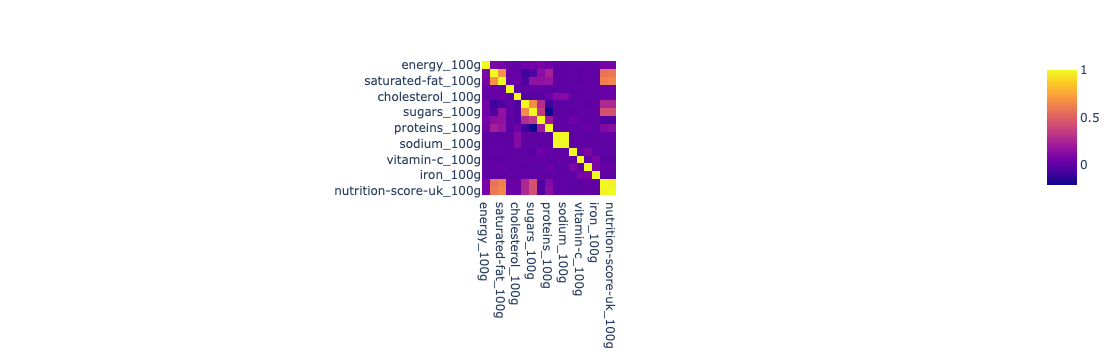

In [66]:
mask = (df.dtypes == 'float64') & (df.columns.str.contains('100g'))
corr_matrix = df.loc[:, mask].corr()
heatmap = px.imshow(corr_matrix)
heatmap.show()

In [45]:
len(df['product_name'].unique())

221348

In [46]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_pct = missing_values / 320772 * 100
variables_50pct_null = (50 < missing_values_pct)

In [47]:
df.loc[:, variables_50pct_null]

,quantity,packaging,categories,categories_fr,additives_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,trans-fat_100g,cholesterol_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,1kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,0.0,0.0214,0.000,0.00129
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,0.0,0.0000,0.071,0.00129
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,0.00514
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,1,Plastique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,NaN,Plastique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,0.0,0.0000,0.000,0.00000
320769,50 g,Plastique,Potato chips,"Snacks salés,Apéritif,Chips et frites,Chips,Ch...",NaN,Salty snacks,Appetizers,en:chips-and-fries,Chips et frites,NaN,NaN,NaN,NaN,NaN,NaN
320770,67g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### B. Outliers handling

## 3. Cleaning

## 4. Evaluation